# Handwritten digits recognition (using Multilayer Perceptron)
### Mantas Macionis / C00242178

This is a Demo Notebook based on Multilayer Perceptron(Feed Forward) Networks, Originally created by trekhleb and downloaded from [github](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb)

The purpose of editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

[Go to CHANGELOG](#changelog)

## Changelog 
- Obtained accuracy metrics for model using original dataset (High metrics observed)
- loaded in Kaggle [Titanic Survivor](https://www.kaggle.com/c/titanic/data) dataset, commonly used for classification tasks
- Modified model architecture to suit new dataset ( to suit new classification task )
- Trained model with new dataset
- Tested model effectiveness by making predictions of samples from dataset
- Accuracy observed (84%) was lower then accuracy score for number recognition (97%)
- Changed model architecture to include a dropout layer 
- performed preprocessing steps to clean missing data values, get rid of un-useful data
- trained model after changes
- accuracy showed significant improvements (90%)
- output confusion matrix for the new model
- saved the model as a .h5 file 8

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

![digits_recognition_mlp.png](./digits_recognition_mlp.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [21]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.__version__)

Python version: 3.9.0
Tensorflow version: 2.15.0
Keras version: 2.15.0


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [25]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [26]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [27]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

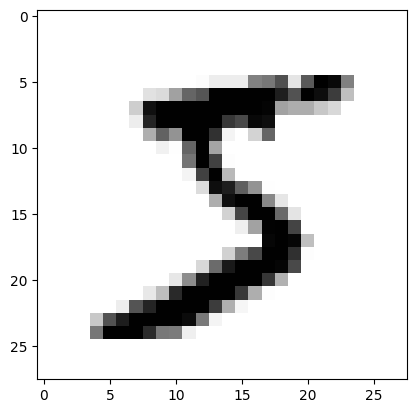

In [36]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

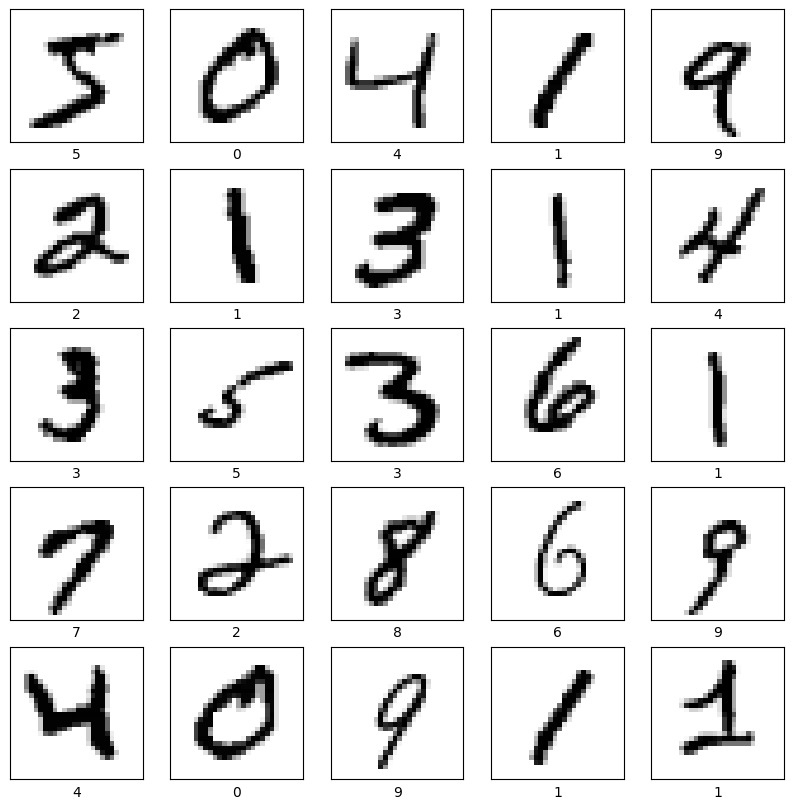

In [37]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [38]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [39]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

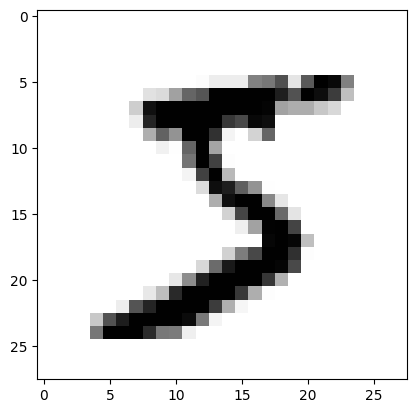

In [40]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).

In [41]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

Here is our model summary so far.

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [44]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [45]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5240 - accuracy: 0.9221 - val_loss: 0.3502 - val_accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3020 - accuracy: 0.9541 - val_loss: 0.2726 - val_accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9593 - val_loss: 0.2574 - val_accuracy: 0.9587
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2409 - accuracy: 0.9627 - val_loss: 0.2177 - val_accuracy: 0.9695
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2256 - accuracy: 0.9650 - val_loss: 0.2080 - val_accuracy: 0.9689
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2147 - accuracy: 0.9661 - val_loss: 0.2184 - val_accuracy: 0.9654
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2069 - accuracy: 0.9674 - val_loss: 0.1946 - val_accurac

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

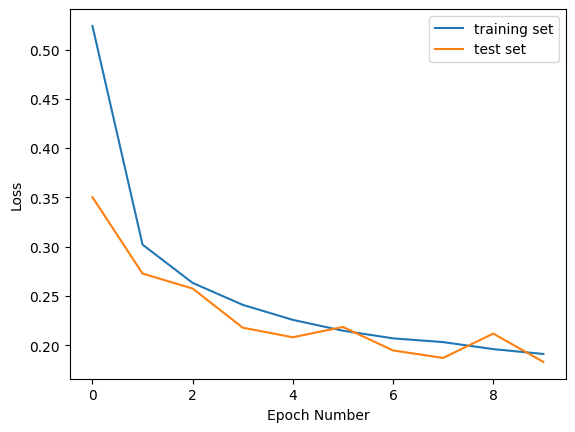

In [46]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

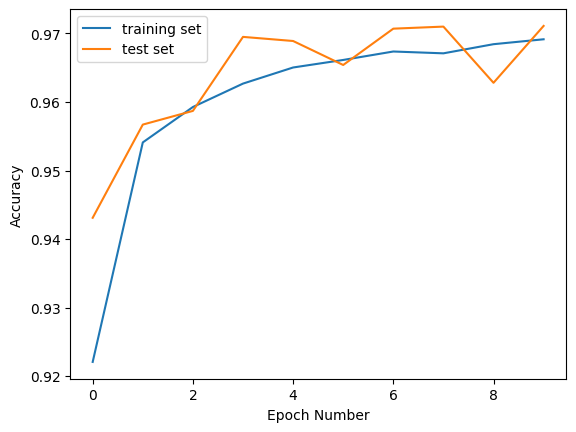

In [47]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [48]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [49]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.17218966782093048
Training accuracy:  0.9753666520118713


### Test set accuracy

In [50]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [51]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.18296250700950623
Validation accuracy:  0.9710999727249146


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [52]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

c:\users\35387\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [54]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 0s 664us/step


In [55]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [56]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.494421e-07,6.985961e-05,7.728475e-04,1.206476e-03,7.650137e-08,9.516091e-06,1.121047e-09,9.978683e-01,4.035749e-05,3.178708e-05
1,5.942623e-04,5.439161e-04,9.975702e-01,1.123091e-03,4.605825e-08,3.950284e-05,5.834478e-05,1.985988e-05,5.075593e-05,1.235114e-08
2,1.318376e-05,9.928737e-01,1.183154e-03,1.844894e-04,9.815712e-04,6.879999e-05,4.097418e-04,2.920901e-03,1.356428e-03,8.004655e-06
3,9.993240e-01,3.586133e-06,1.383664e-04,4.410363e-06,1.347760e-05,2.455063e-05,2.917603e-04,1.719978e-04,5.265729e-07,2.745466e-05
4,6.773736e-06,4.503382e-06,6.360084e-06,3.535688e-07,9.991177e-01,9.309208e-06,1.659912e-04,6.684921e-05,2.736423e-05,5.948258e-04
...,...,...,...,...,...,...,...,...,...,...
9995,1.155836e-08,2.018970e-05,9.999206e-01,4.032161e-05,5.298807e-14,1.955518e-08,3.870566e-10,1.678610e-05,1.970624e-06,6.353907e-12
9996,4.224206e-09,5.152086e-05,4.667633e-06,9.998379e-01,4.873245e-10,9.693782e-05,3.320766e-11,4.141503e-07,2.459869e-06,6.155825e-06
9997,3.324756e-08,1.068577e-05,6.020126e-08,5.040475e-07,9.994791e-01,7.195635e-07,8.291576e-07,7.903560e-05,3.973235e-05,3.892846e-04
9998,2.518989e-06,1.508521e-06,9.386192e-09,1.425536e-04,3.226001e-08,9.993573e-01,3.197032e-05,3.640303e-07,4.624697e-04,1.269442e-06


In [57]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [58]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

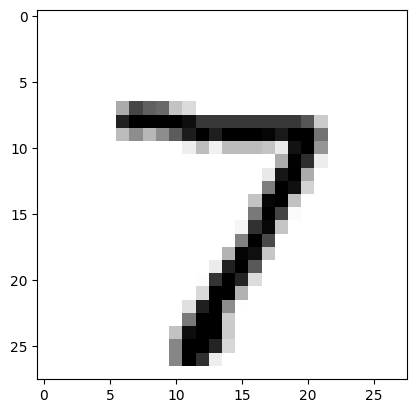

In [59]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

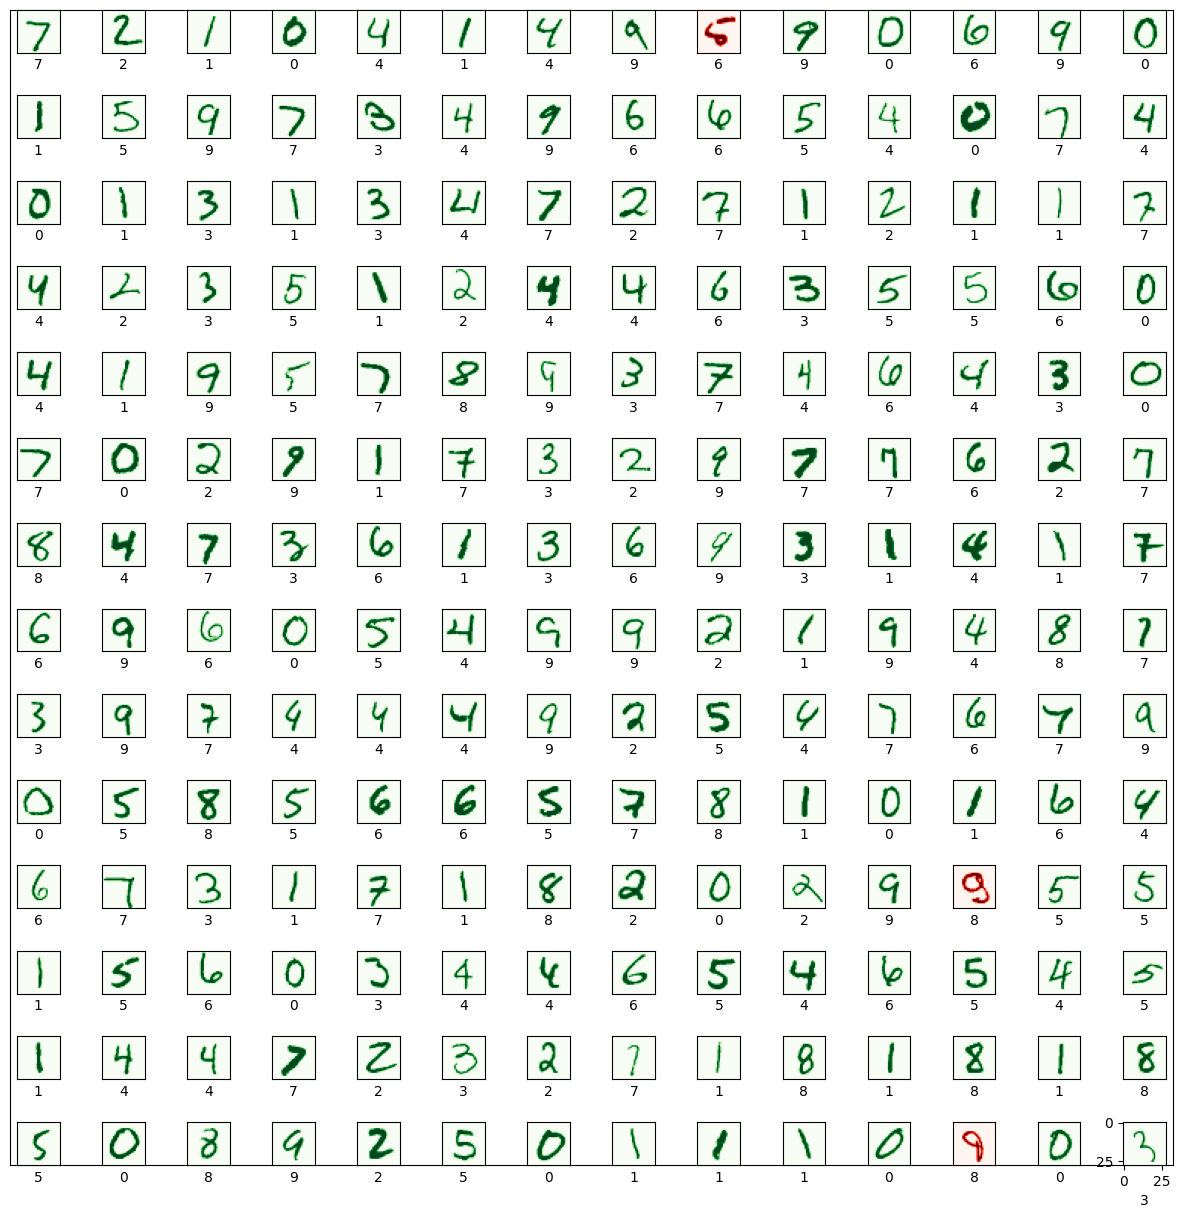

In [60]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

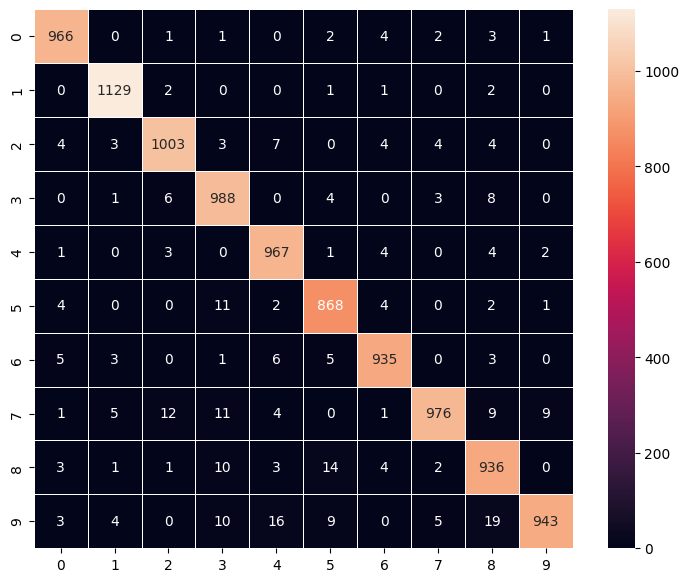

In [61]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<a id="changelog"></a>
# CHANGELOG

## Accuracy scores for the original model 

In [62]:
print('Training accuracy: ', train_accuracy)
print('Validation accuracy: ', validation_accuracy)


Training accuracy:  0.9753666520118713
Validation accuracy:  0.9710999727249146


<h2>Loading in the titanic dataset from kaggle</h2>
(Binary Classification Dataset)

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Load Titanic dataset
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

# Define numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# transform to numeric 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# transform to numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_train = preprocessor.fit_transform(train_data)
X_test = preprocessor.transform(test_data)
y_train = train_data['Survived']

# Adjust model input layer to new input shape
input_shape = X_train.shape[1]  
model.layers[0] = tf.keras.layers.Flatten(input_shape=(input_shape,))



<h2>Compiling of model with new dataset</h2>

In [71]:
# Define the model for the Titanic dataset
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Reinstantiate the optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the new optimizer
model.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model summary to verify the structure
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                832       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2>Training the model</h2>

In [72]:
# Fit the model
training_history_titanic = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2  
)

# Evaluate the model on the training data
train_loss_titanic, train_accuracy_titanic = model.evaluate(X_train, y_train)
print('Training loss on Titanic: ', train_loss_titanic)
print('Training accuracy on Titanic: ', train_accuracy_titanic)


Epoch 1/10
23/23 [==============================] - 1s 6ms/step - loss: 0.7250 - accuracy: 0.6081 - val_loss: 0.6064 - val_accuracy: 0.7933
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7472 - val_loss: 0.5056 - val_accuracy: 0.8324
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7949 - val_loss: 0.4612 - val_accuracy: 0.8436
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7963 - val_loss: 0.4387 - val_accuracy: 0.8492
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8006 - val_loss: 0.4337 - val_accuracy: 0.8492
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8034 - val_loss: 0.4219 - val_accuracy: 0.8547
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8160 - val_loss: 0.4180 - val_accuracy: 0.8547
Epoch 8/10
23/23 [==

<h2>Saving the model</h2>

In [73]:
# Save the trained model
model_name = 'titanic_survival_model.h5'
model.save(model_name)
print(f"Model saved as {model_name}.")


Model saved as titanic_survival_model.h5.


c:\users\35387\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h3>Loading the new model</3>

In [74]:
loaded_model = tf.keras.models.load_model(model_name)
print("Model loaded successfully.")

Model loaded successfully.


<h2>Load some sample entries from the dataset</h2>

In [75]:
# Taking a sample of 5 entries from the test set
sample_inputs = X_test[:5]
sample_predictions = loaded_model.predict(sample_inputs)

# sigmoid probabilities, so threshold is set to 0.5 to determine survival
predicted_survival = (sample_predictions > 0.5).astype(int).flatten()  
print("Sample Predictions (1 = Survived, 0 = Not Survived):", predicted_survival)


1/1 [==============================] - 0s 30ms/step
Sample Predictions (1 = Survived, 0 = Not Survived): [0 0 0 0 0]


<h2>Output Survival Predictions</h2>

In [76]:
import pandas as pd

sample_details = test_data.iloc[:5]  

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'PassengerId': sample_details['PassengerId'],
    'Name': sample_details['Name'],
    'Pclass': sample_details['Pclass'],
    'Sex': sample_details['Sex'],
    'Age': sample_details['Age'],
    'Predicted Survival': predicted_survival,
    'Survival Probability': sample_predictions.flatten()
})

print("Detailed Results for Sample Inputs:")
print(results_df)


Detailed Results for Sample Inputs:
   PassengerId                                          Name  Pclass     Sex  \
0          892                              Kelly, Mr. James       3    male   
1          893              Wilkes, Mrs. James (Ellen Needs)       3  female   
2          894                     Myles, Mr. Thomas Francis       2    male   
3          895                              Wirz, Mr. Albert       3    male   
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)       3  female   

    Age  Predicted Survival  Survival Probability  
0  34.5                   0              0.088900  
1  47.0                   0              0.420175  
2  62.0                   0              0.064547  
3  27.0                   0              0.103136  
4  22.0                   0              0.491944  


<h2> Preprocessing steps to include more features</h2>
- filled in missing age values <br>
- new FamilySize Feature added <br>
- Cabin Feature modification<br>
- drop unhelpful columns<br>
- Add dropout layer 

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Update the preprocessing pipeline to include more features
def preprocess_data(data):
    # Fill missing 'Age' values with the median of the column
    data['Age'].fillna(data['Age'].median(), inplace=True)
    
    # Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    # Simplify the 'Cabin' feature to indicate whether a cabin number is available
    data['HasCabin'] = data['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    
    # Drop columns that are unlikely to be helpful
    data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)
    
    # Mapping 'Sex' and 'Embarked' to numerical values
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'].fillna('S', inplace=True)  # Fill missing with 'S' (most common)
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
    
    return data

# Apply preprocessing to the training and test sets
train_data_processed = preprocess_data(train_data.copy())
test_data_processed = preprocess_data(test_data.copy())

# Update model architecture slightly
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data_processed.shape[1],)),
    tf.keras.layers.Dropout(0.1),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
training_history = model.fit(train_data_processed, y_train, epochs=15, validation_split=0.2)

# Evaluate and print results
final_train_loss, final_train_accuracy = model.evaluate(train_data_processed, y_train)
print('Final Training Loss:', final_train_loss)
print('Final Training Accuracy:', final_train_accuracy)


Epoch 1/15


C:\Users\35387\AppData\Local\Temp\ipykernel_2172\3382242833.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\35387\AppData\Local\Temp\ipykernel_2172\3382242833.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

23/23 [==============================] - 1s 6ms/step - loss: 1.1444 - accuracy: 0.5885 - val_loss: 0.5734 - val_accuracy: 0.7039
Epoch 2/15
23/23 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.6236 - val_loss: 0.5496 - val_accuracy: 0.6872
Epoch 3/15
23/23 [==============================] - 0s 2ms/step - loss: 0.8009 - accuracy: 0.6278 - val_loss: 0.5066 - val_accuracy: 0.7765
Epoch 4/15
23/23 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.6699 - val_loss: 0.4893 - val_accuracy: 0.7430
Epoch 5/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6938 - val_loss: 0.4890 - val_accuracy: 0.7877
Epoch 6/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7008 - val_loss: 0.4519 - val_accuracy: 0.8156
Epoch 7/15
23/23 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.7317 - val_loss: 0.4357 - val_accuracy: 0.7989
Epoch 8/15
23/23 [=============

<h2>Accuracy scores show big improvement from optimized preprocessing, dropout layer</h2>

<h3>Save the updated model</h3>

In [79]:
# Save the trained model
model_name = 'processed_titanic_survival_model.h5'
model.save(model_name)
print(f"Model saved as {model_name}.")

Model saved as processed_titanic_survival_model.h5.


c:\users\35387\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h3>Confusion Matrix Setup</h3>

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions_prob = model.predict(train_data_processed)
predictions = (predictions_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1

true_labels = y_train


28/28 [==============================] - 0s 662us/step


In [81]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[504  45]
 [ 40 302]]


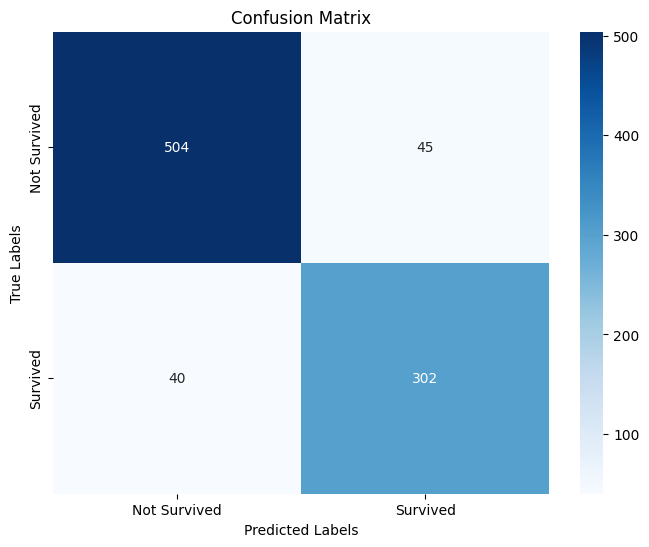

In [82]:
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
